# 한글 폰트 설정

In [ ]:
# 한글 폰트를 설치합니다.
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null

In [ ]:
# 설치한 후 런타임 재실행!
import os
os.kill(os.getpid(), 9)

In [ ]:
# 한글 폰트를 설정합니다.
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')

fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

# 데이터 수집

movielist

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from copy import deepcopy

In [ ]:
# 영화 목록을 API 를 사용해 가져옵니다.
APIKEY = 'USER_API_KEY'
url_movielist = 'http://kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieList.json'

cols_movielist = ['movieCd', 'movieNm', 'movieNmEn', 'prdtYear', 'openDt', 'typeNm', 'prdtStatNm', 'nationAlt', 'genreAlt', 'repNationNm', 'repGenreNm', 'directors', 'companys', 'openYear']
df_movielist = pd.DataFrame(columns=cols_movielist)

for p in range(1000):
 r = requests.get(url_movielist, params={'key':APIKEY, 'openStartDt':'1941', 'openEndDt':'2023', 'itemPerPage':'100', 'curPage':str(p+1)})
 df_ = pd.DataFrame(r.json()['movieListResult']['movieList'])
 df_movielist = pd.concat([df_movielist, df_], axis=0)
 df_movielist.to_pickle("/content/movielist.pkl")

# 제작년도가 공백인 경우 NaN, 그 이외는 데이터 타입을 int 로 변경합니다.
df_movielist.loc[df_movielist["prdtYear"] == "", "prdtYear"] = np.nan
df_movielist.loc[~df_movielist["prdtYear"].isna(), "prdtYear"] = df_movielist.loc[~df_movielist["prdtYear"].isna()]["prdtYear"].astype(int)

# Date 형식의 개봉일자를 슬라이싱해 개봉년도를 채우고 데이터 타입을 int 로 변경합니다.
df_movielist["openYear"]=df_movielist["openDt"].apply(lambda x: x[:4])
df_movielist["openYear"]=df_movielist["openYear"].astype(int)

# 개봉일자도 데이터 타입을 int 로 변경합니다.
df_movielist["openDt"]=df_movielist["openDt"].astype(int)

# 개봉일자를 기준해 영화목록을 정렬합니다.
df_movielist.sort_values("openDt")
df_movielist.reset_index(drop=True, inplace=True)

# 영화목록을 객체로 변환해 파일로 저장합니다.
df_movielist.to_pickle("/content/movielist.pkl")

KeyboardInterrupt: ignored

In [ ]:
df_movielist = pd.read_pickle("/content/movielist.pkl")

# 미개봉 영화를 제외합니다.
df_movielist = df_movielist.query("prdtStatNm == '개봉'")

# 대표국가가 공백인 데이터들도 제외합니다.
df_movielist = df_movielist.drop(df_movielist.query("repNationNm == ''").index)

In [ ]:
df_movielist = pd.read_pickle("/content/movielist.pkl")

# 영화사가 공백인 경우를 제외합니다.
df_movielist["companys"] = df_movielist["companys"].astype(str)
df_movielist = df_movielist.loc[df_movielist["companys"] != '[]']

# 영화사를 슬라이싱해 데이터 타입을 str 로 변경합니다.
df_movielist["companys"] = df_movielist["companys"].apply(lambda x: x.split("'")[7])
df_movielist["companys"] = df_movielist["companys"].astype(str)

# 월트디즈니 영화사 데이터셋을 구축합니다.
movielist_companys = ['월트디즈니', '월트 디즈니 픽쳐스', '월트디즈니코리아㈜', '월트 디즈니 프로덕션', '월트디즈니컴퍼니코리아(주)', '월트디즈니 애니메이션 스튜디오']
df_movielist_target = df_movielist[df_movielist['companys'].isin(movielist_companys)]

<ipython-input-4-12191cd746a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movielist["companys"] = df_movielist["companys"].apply(lambda x: x.split("'")[7])
<ipython-input-4-12191cd746a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movielist["companys"] = df_movielist["companys"].astype(str)


In [ ]:
df_movielist.to_pickle("/content/movielist.pkl")
df_movielist_target.to_pickle("/content/movielist_target.pkl")

boxoffice

In [ ]:
# KOBIS 에서 제공해주는 박스오피스 자료를 가져옵니다.
url_boxoffice = "https://jehyunlee.github.io/about/src/2021_datastory_movie/KOBIS_boxoffice.xlsx"
df_boxoffice = pd.read_excel(url_boxoffice, engine="openpyxl")

# 개봉일이 공백(NaT)인 경우를 제외한 후 데이터 타입을 str 로 변경합니다.
df_boxoffice = df_boxoffice.loc[df_boxoffice["개봉일"] != 'NaT']
df_boxoffice["개봉일"] = df_boxoffice["개봉일"].astype(str)

# 개봉일을 슬라이싱해 개봉년도를 채우고 형식이 잘못된 데이터들은 제외합니다.
df_boxoffice["openYear"] = df_boxoffice["개봉일"].apply(lambda x: x.split("-")[0])
df_boxoffice = df_boxoffice.loc[df_boxoffice["openYear"] != 'NaT']

# 개봉년도의 데이터 타입을 int 로 변경합니다.
df_boxoffice["openYear"] = df_boxoffice["openYear"].astype(int)

In [ ]:
# 관객수 0일 경우를 제거합니다.
boxoffice_zero = df_boxoffice.loc[df_boxoffice["서울 관객수"] == 0].loc[df_boxoffice["전국 관객수"] == 0]
boxoffice_zero = boxoffice_zero.query("1941<= openYear")[["영화명", "국적", "openYear"]].sort_values("openYear").apply(lambda x: f"{x[0]} ({x[1]}, {x[2]})", axis=1)
df_boxoffice = df_boxoffice.loc[list(set(df_boxoffice.index) - set(boxoffice_zero.index))]

In [ ]:
# 월트디즈니 영화를 따로 분리해놓아 저장합니다.
df_boxoffice_target = df_boxoffice.loc[df_boxoffice["제작사"].str.contains('디즈니') | df_boxoffice["수입사"].str.contains('디즈니') | df_boxoffice["배급사"].str.contains('디즈니')]

In [ ]:
df_boxoffice.to_pickle("/content/boxoffice.pkl")
df_boxoffice_target.to_pickle("/content/boxoffice_target.pkl")

# 데이터 전처리

movielist

In [ ]:
# 나중에 사용할 장르 데이터셋을 새롭게 구축합니다.
df_movielist_genres = df_movielist[["movieCd", "movieNm", "openYear", "genreAlt"]]
df_movielist_target_genres = df_movielist_target[["movieCd", "movieNm", "openYear", "genreAlt"]]

# 장르가 공백일 경우를 제거합니다.
df_movielist_genres.dropna(subset=["genreAlt"], inplace=True)
df_movielist_target_genres.dropna(subset=["genreAlt"], inplace=True)

# 영화 장르의 종류를 알아냅니다.
movielist_genres = np.unique(','.join(df_movielist_genres.loc[df_movielist_genres["genreAlt"] != ""]['genreAlt']).split(','))
movielist_genres = [genre.split("(")[0] for genre in movielist_genres]

<ipython-input-10-54ce2f2185d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movielist_genres.dropna(subset=["genreAlt"], inplace=True)
<ipython-input-10-54ce2f2185d8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movielist_target_genres.dropna(subset=["genreAlt"], inplace=True)


In [ ]:
# 새로운 장르컬럼을 one-hot incodeing 형식과 유사하도록 생성합니다.
for movielist_genre in movielist_genres:
 df_movielist_genres[f"Genre_{movielist_genre}"] = df_movielist_genres["genreAlt"].str.contains(movielist_genre.split("(")[0]).astype('int')
 df_movielist_target_genres[f"Genre_{movielist_genre}"] = df_movielist_target_genres["genreAlt"].str.contains(movielist_genre.split("(")[0]).astype('int')

# 구 장르컬럼을 제거합니다.
df_movielist_genres.drop("genreAlt", axis=1, inplace=True)
df_movielist_target_genres.drop("genreAlt", axis=1, inplace=True)

# 장르가 공백일 경우는 *(0) 기타로 지정합니다.
df_movielist_genres.loc[df_movielist_genres.filter(like="Genre_").sum(axis=1) == 0, "Genre_기타"] = 1
df_movielist_target_genres.loc[df_movielist_target_genres.filter(like="Genre_").sum(axis=1) == 0, "Genre_기타"] = 1

<ipython-input-11-27bcc0707e7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movielist_genres[f"Genre_{movielist_genre}"] = df_movielist_genres["genreAlt"].str.contains(movielist_genre.split("(")[0]).astype('int')
<ipython-input-11-27bcc0707e7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movielist_target_genres[f"Genre_{movielist_genre}"] = df_movielist_target_genres["genreAlt"].str.contains(movielist_genre.split("(")[0]).astype('int')
<ipython-input-11-27bcc0707e7f>:3: SettingWithCopyWarnin

In [ ]:
# 장르가 2 개 이상일 경우 복합장르로 지정합니다.
df_movielist_genres["복합장르"] = 0
df_movielist_target_genres["복합장르"] = 0

df_movielist_genres.loc[df_movielist_genres.filter(like="G_").sum(axis=1) > 1, "복합장르"] = 1
df_movielist_target_genres.loc[df_movielist_target_genres.filter(like="G_").sum(axis=1) > 1, "복합장르"] = 1

In [ ]:
df_movielist_genres.iloc[df_movielist_genres.filter(like="G_").sum(axis=1).argmax()]
df_movielist_target_genres.iloc[df_movielist_target_genres.filter(like="G_").sum(axis=1).argmax()]

movieCd         19820118
movieNm             환타지아
openYear            1982
Genre_SF               0
Genre_가족               1
Genre_공연               0
Genre_공포               0
Genre_기타               0
Genre_다큐멘터리            0
Genre_드라마              0
Genre_멜로/로맨스           0
Genre_뮤지컬              0
Genre_미스터리             0
Genre_범죄               0
Genre_사극               0
Genre_서부극              0
Genre_성인물              0
Genre_스릴러              0
Genre_애니메이션            0
Genre_액션               0
Genre_어드벤처             0
Genre_전쟁               0
Genre_코미디              0
Genre_판타지              1
복합장르                   0
Name: 484, dtype: object

In [ ]:
# 년도별 장르 데이터셋 구축
df_movielist_genresY = df_movielist_genres[["movieCd", "openYear"]].groupby("openYear").count().reset_index().merge(df_movielist_genres.iloc[:,2:].groupby("openYear").sum().reset_index())
df_movielist_target_genresY = df_movielist_target_genres[["movieCd", "openYear"]].groupby("openYear").count().reset_index().merge(df_movielist_target_genres.iloc[:,2:].groupby("openYear").sum().reset_index())

df_movielist_genresY.drop("movieCd", axis=1, inplace=True)
df_movielist_target_genresY.drop("movieCd", axis=1, inplace=True)

df_movielist_genresY.fillna(0, inplace=True)
df_movielist_target_genresY.fillna(0, inplace=True)

In [ ]:
df_movielist_genres.to_pickle("/content/movielist_genres.pkl")
df_movielist_genresY.to_pickle("/content/movielist_genresY.pkl")

df_movielist_target_genres.to_pickle("/content/movielist_target_genres.pkl")
df_movielist_target_genresY.to_pickle("/content/movielist_target_genresY.pkl")

Boxdoffice

In [ ]:
# 영화 목록 데이터
df_movie_boxoffice = df_movielist[["movieCd", "movieNm", "openDt", "repNationNm"]]
df_movie_boxoffice_target = df_movielist_target[["movieCd", "movieNm", "openDt", "repNationNm"]]

# 영화명의 띄어쓰기를 제거합니다.
df_movie_boxoffice["movieNm"] = df_movie_boxoffice["movieNm"].apply(lambda x: x.replace(" ", ""))
df_movie_boxoffice_target["movieNm"] = df_movie_boxoffice_target["movieNm"].apply(lambda x: x.replace(" ", ""))

# 박스오피스 데이터하고 병합시키기 위해서 데이터 타입을 맞춰줍니다.
df_movie_boxoffice["openDt"] = df_movie_boxoffice["openDt"].astype(str)
df_movie_boxoffice_target["openDt"] = df_movie_boxoffice_target["openDt"].astype(str)

df_movie_boxoffice["openDt"] = df_movie_boxoffice["openDt"].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}")
df_movie_boxoffice_target["openDt"] = df_movie_boxoffice_target["openDt"].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}")

# 병합 Key로서 영화명, 개봉일, 대표국적을 사용합니다.
df_movie_boxoffice["영화명_개봉일_대표국적"] = df_movie_boxoffice[["movieNm", "openDt", "repNationNm"]].apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}", axis=1)
df_movie_boxoffice_target["영화명_개봉일_대표국적"] = df_movie_boxoffice_target[["movieNm", "openDt", "repNationNm"]].apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}", axis=1)

<ipython-input-16-5b795efb5fdd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_boxoffice["movieNm"] = df_movie_boxoffice["movieNm"].apply(lambda x: x.replace(" ", ""))
<ipython-input-16-5b795efb5fdd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_boxoffice_target["movieNm"] = df_movie_boxoffice_target["movieNm"].apply(lambda x: x.replace(" ", ""))
<ipython-input-16-5b795efb5fdd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [ ]:
# 박스오피스 데이터
df_boxoffice_genres = deepcopy(df_boxoffice)
df_boxoffice_target_genres = deepcopy(df_boxoffice_target)

# 영화명의 띄어쓰기를 제거합니다.
df_boxoffice_genres["영화명"] = df_boxoffice_genres["영화명"].str.replace(' ', '')
df_boxoffice_target_genres["영화명"] = df_boxoffice_target_genres["영화명"].str.replace(' ', '')

# 병합 Key로서 영화명, 개봉일, 대표국적을 사용합니다.
df_boxoffice_genres["영화명_개봉일_대표국적"] = df_boxoffice_genres[["영화명", "개봉일", "국적"]].apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}", axis=1)
df_boxoffice_target_genres["영화명_개봉일_대표국적"] = df_boxoffice_target_genres[["영화명", "개봉일", "국적"]].apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}", axis=1)

In [ ]:
# Key 를 사용해 병합을 준비합니다. *(DB Query Join)
list(set(df_movie_boxoffice["영화명_개봉일_대표국적"]) - set(df_boxoffice_genres["영화명_개봉일_대표국적"]))
list(set(df_movie_boxoffice_target["영화명_개봉일_대표국적"]) - set(df_boxoffice_target_genres["영화명_개봉일_대표국적"]))

['소울_2021-01-20_미국', '피터팬_1957-06-13_미국']

In [ ]:
# Key 를 사용해 병합을 진행합니다.
df_boxoffice_genres = df_movie_boxoffice.merge(df_boxoffice_genres[["영화명_개봉일_대표국적", "영화명", "개봉일", "서울 관객수", "전국 관객수", "국적", "openYear"]])
df_boxoffice_target_genres = df_movie_boxoffice_target.merge(df_boxoffice_target_genres[["영화명_개봉일_대표국적", "영화명", "개봉일", "서울 관객수", "전국 관객수", "국적", "openYear"]])

# 이전에 완성한 df_movielist_genres 를 병합해 박스오피스 + 장르의 데이터셋을 구축합니다.
df_boxoffice_genres = df_boxoffice_genres.merge(df_movielist_genres.drop(["movieNm", "openYear"], axis=1), on="movieCd")
df_boxoffice_target_genres = df_boxoffice_target_genres.merge(df_movielist_genres.drop(["movieNm", "openYear"], axis=1), on="movieCd")

# 사용한 Key 와 중복된 컬럼을 제거합니다.
df_movie_boxoffice = df_boxoffice_genres.drop(["movieNm", "openDt", "repNationNm", "영화명_개봉일_대표국적"], axis=1)
df_boxoffice_target_genres = df_boxoffice_target_genres.drop(["movieNm", "openDt", "repNationNm", "영화명_개봉일_대표국적"], axis=1)

In [ ]:
df_movielist_target_genres.to_pickle("/content/movielist_target_genres.pkl")
df_movie_boxoffice_target.to_pickle("/content/movie_boxoffice_target.pkl")

df_boxoffice_genres.to_pickle("/content/boxoffice_genres.pkl")
df_boxoffice_target_genres.to_pickle("/content/boxoffice_target_genres.pkl")

In [ ]:
# 년도별 관객수 데이터
df_boxofficeY_audience = df_boxoffice[["openYear", "전국 관객수", "서울 관객수"]].groupby("openYear").sum().reset_index()
df_boxofficeY_target_audience = df_boxoffice_target[["openYear", "전국 관객수", "서울 관객수"]].groupby("openYear").sum().reset_index()

# 년도별 매출액 데이터
df_boxofficeY_sales = df_boxoffice[["openYear", "전국 매출액", "서울 매출액"]].groupby("openYear").sum().reset_index()
df_boxofficeY_target_sales = df_boxoffice_target[["openYear", "전국 매출액", "서울 매출액"]].groupby("openYear").sum().reset_index()

In [ ]:
df_boxofficeY_audience.to_pickle("/content/boxofficeY_audience.pkl")
df_boxofficeY_target_audience.to_pickle("/content/boxofficeY_target_audience.pkl")

df_boxofficeY_sales.to_pickle("/content/boxofficeY_sales.pkl")
df_boxofficeY_target_sales.to_pickle("/content/boxofficeY_target_sales.pkl")

In [88]:
df_boxofficeY_audience.head()

,openYear,전국 관객수,서울 관객수
0,1962,0,180856
1,1968,0,12382
2,1971,0,11503090
3,1972,0,10738276
4,1973,0,8328184


In [89]:
df_boxofficeY_target_audience.head()

,openYear,전국 관객수,서울 관객수
0,1972,0,242204
1,1973,0,98361
2,1982,0,111653
3,1990,0,9117
4,1991,0,442883


In [90]:
df_boxofficeY_audience.tail()

,openYear,전국 관객수,서울 관객수
47,2016,212928941,57049324
48,2017,225312985,58635474
49,2018,205581145,53250017
50,2019,226578274,57013950
51,2020,50741877,13245891


In [91]:
df_boxofficeY_target_audience.tail()

,openYear,전국 관객수,서울 관객수
27,2016,30373696,8857476
28,2017,23165776,6968324
29,2018,40087724,11471351
30,2019,64475394,16983378
31,2020,1928655,583776


In [118]:
movie_audience = df_boxofficeY_audience.query("1972 <= openYear <= 2020")["openYear"]
movie_audience

3     1972
4     1973
5     1974
6     1975
7     1976
8     1977
9     1978
10    1979
11    1980
12    1981
13    1982
14    1983
15    1984
16    1985
17    1986
18    1987
19    1988
20    1989
21    1990
22    1991
23    1992
24    1993
25    1994
26    1995
27    1996
28    1997
29    1998
30    1999
31    2000
32    2001
33    2002
34    2003
35    2004
36    2005
37    2006
38    2007
39    2008
40    2009
41    2010
42    2011
43    2012
44    2013
45    2014
46    2015
47    2016
48    2017
49    2018
50    2019
51    2020
Name: openYear, dtype: int64

# 데이터 시각화

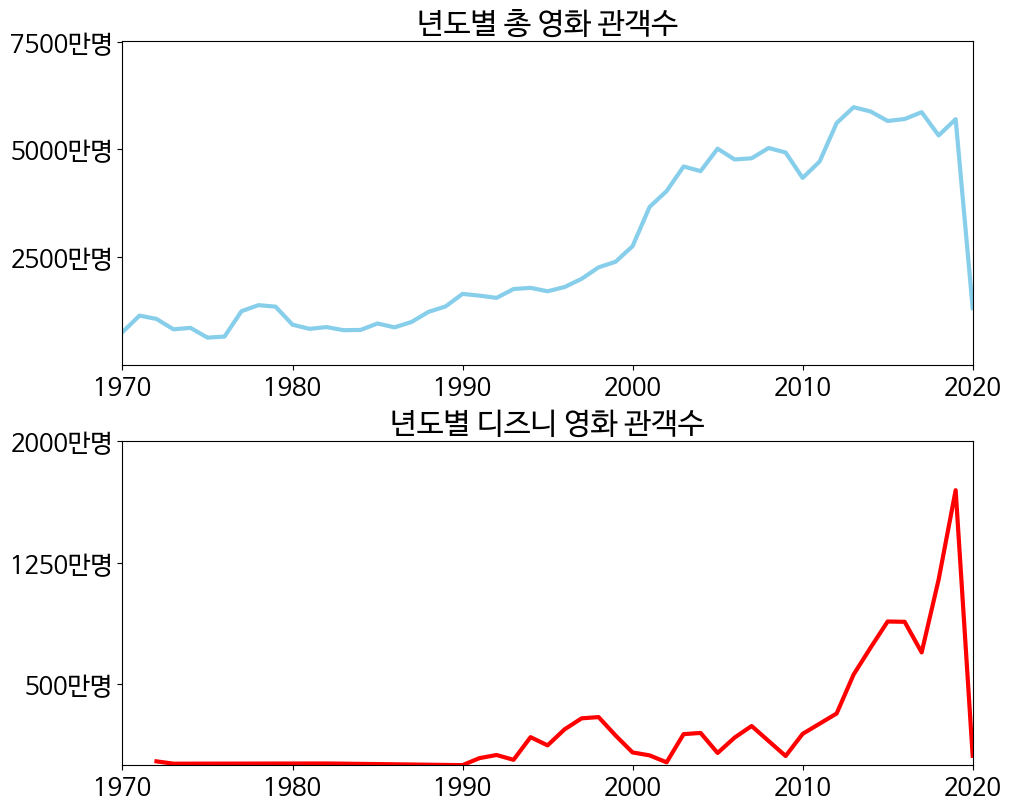

In [150]:
fig, ax = plt.subplots(figsize=(10, 8), constrained_layout=True, nrows=2)

# ax[0] = sns.distplot(df_boxofficeY_audience["openYear"], df_boxofficeY_audience["서울 관객수"], color='skyblue', label='서울 관객수', ax=ax[0])
# ax[1] = sns.distplot(df_boxofficeY_target_audience["openYear"], df_boxofficeY_target_audience["서울 관객수"], label='타겟 서울 관객수', ax=ax[1])

ax[0].plot(df_boxofficeY_audience["openYear"], df_boxofficeY_audience["서울 관객수"], color='skyblue', lw=3)
ax[1].plot(df_boxofficeY_target_audience["openYear"], df_boxofficeY_target_audience["서울 관객수"], color='red', lw=3)

ax[0].set_title('년도별 총 영화 관객수')
ax[1].set_title('년도별 디즈니 영화 관객수')

xticks = [1970, 1980, 1990, 2000, 2010, 2020]
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)

ax[0].set_xlim(1970, 2020)
ax[1].set_xlim(1970, 2020)

ax[0].set_ylim(0, 750.5e5)
ax[1].set_ylim(0, 150.5e5)

yticks = [250e5, 500e5, 750e5,]
yticks_target = [50e5, 125e5, 200e5]
ax[0].set_yticks(yticks)
ax[1].set_yticks(yticks_target)

ax[0].set_yticklabels([f"{y/1e4:.0f}만명" if y > 0 else "0" for y in yticks])
ax[1].set_yticklabels([f"{y/1e4:.0f}만명" if y > 0 else "0" for y in yticks_target])

plt.show()